### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 10
len(data)

410

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'03-06-2021'

### New cases in the World changed by day

### ARE WE BEATING COVID-19?

The World still has 37186621.0 active cases

In last 7 days:  [36441145. 36496194. 36494674. 36662330. 36809695. 36993931. 37186621.]


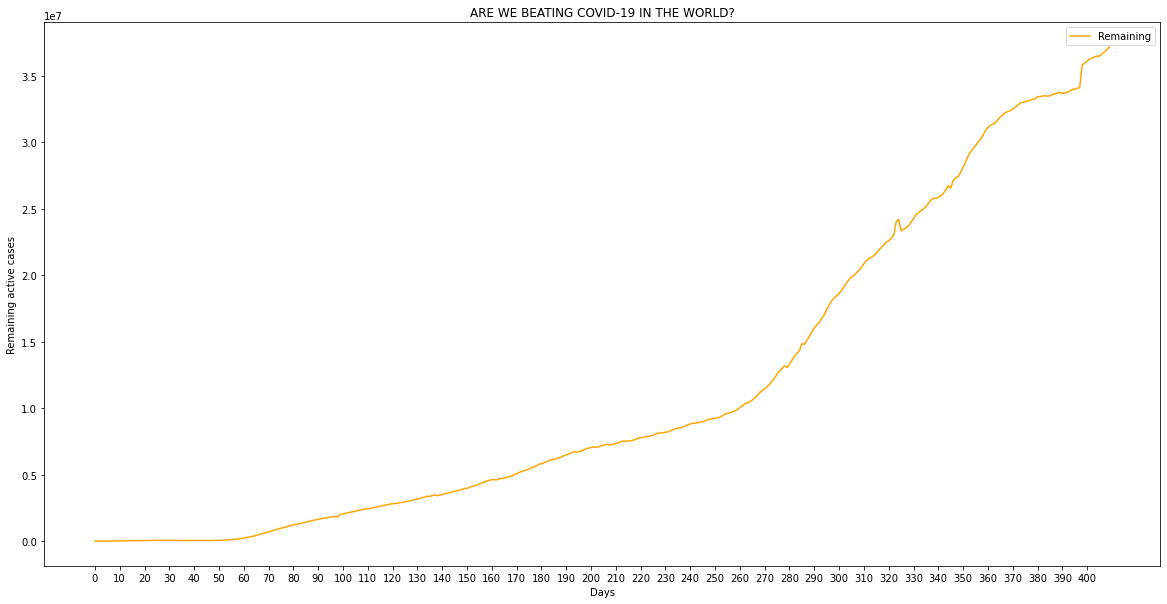

In [4]:
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])
print("In last 7 days: ", remaining_by_day[-7:])

In [14]:
countries_remaining = countries_confirmed-countries_fatalities-countries_recovered
countries_remaining.tail(1)

,"Korea, South",China,Hong Kong,Taiwan*,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
409,7617.0,424.0,0.0,25.0,4022.0,35808.0,32148.0,308.0,903.0,437.0,...,4089403.0,8190.0,701.0,0,6573.0,546.0,18689.0,352.0,3286.0,970.0


In [17]:
daily_confirmed_sum = np.array([sum(countries_confirmed.iloc[i]) for i in range(len(countries_confirmed))])
daily_fatal_sum = np.array([sum(countries_fatalities.iloc[i]) for i in range(len(countries_fatalities))])
daily_recovered_sum = np.array([sum(countries_recovered.iloc[i]) for i in range(len(countries_recovered))])

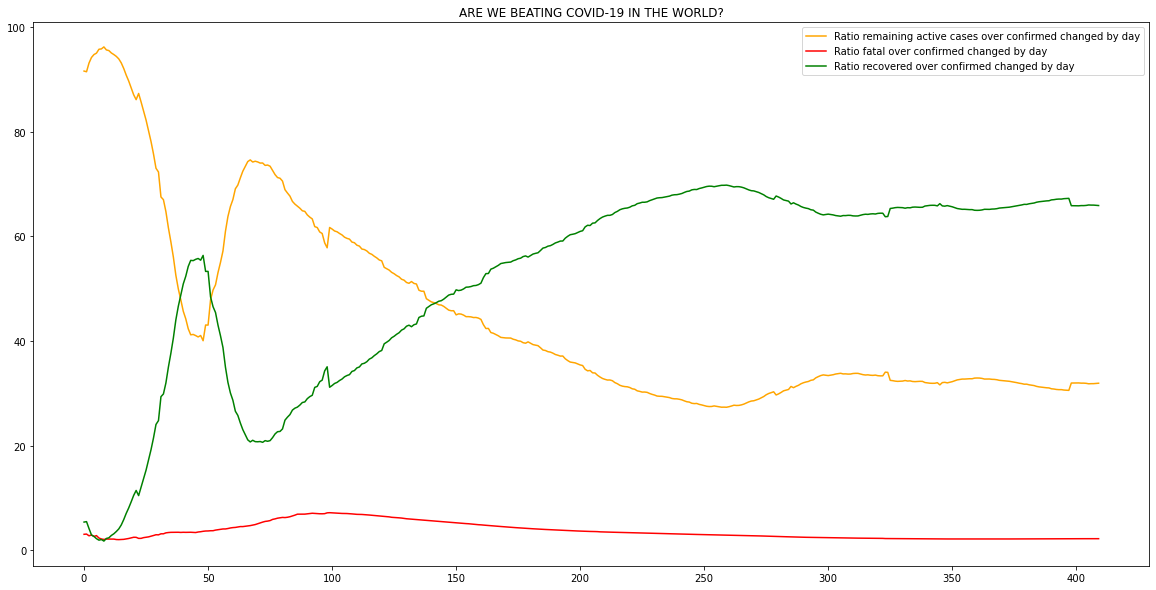

In [18]:
plt.plot(x_dat, ((daily_confirmed_sum-daily_recovered_sum-daily_fatal_sum)/daily_confirmed_sum)*100, color='orange', label='Ratio remaining active cases over confirmed changed by day')
plt.plot(x_dat, (daily_fatal_sum/daily_confirmed_sum)*100, color='red', label='Ratio fatal over confirmed changed by day')
plt.plot(x_dat, (daily_recovered_sum/daily_confirmed_sum)*100, color='green', label='Ratio recovered over confirmed changed by day')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid_ratio.jpg')

### Countries are beating COVID most

,409
Grenada,0.0
Diamond Princess,0.0
Hong Kong,0.0
Micronesia,0.0
MS Zaandam,0.0
Saint Kitts and Nevis,0.0
Vanuatu,0.0
Marshall Islands,0.0
Tajikistan,0.0
Samoa,1.0


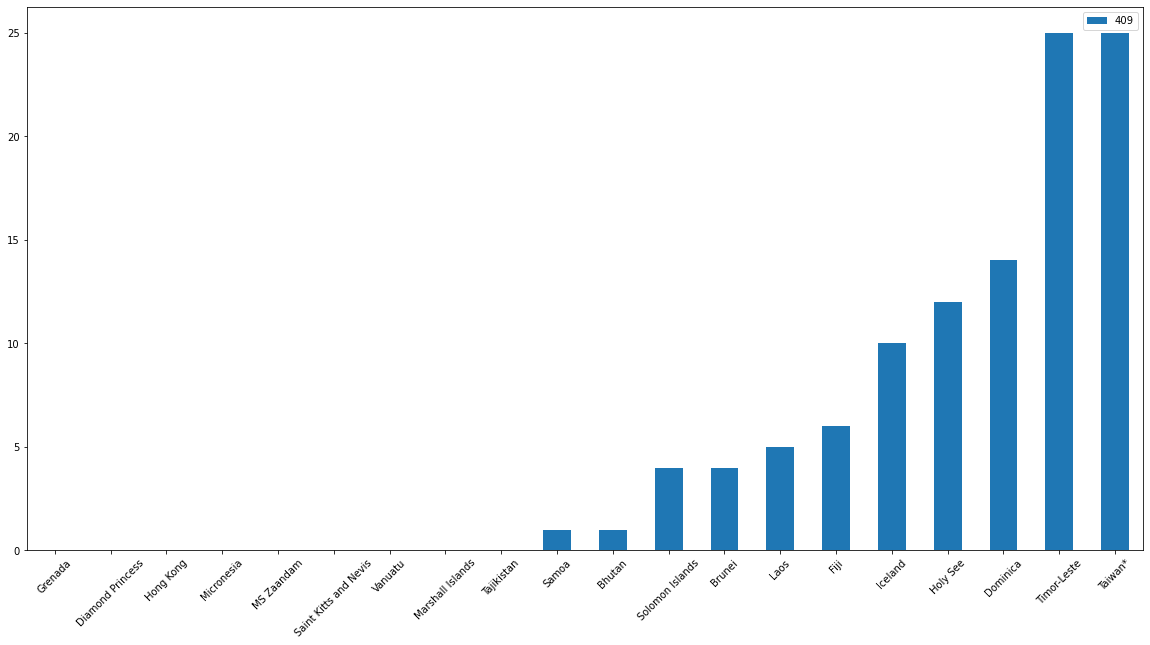

In [19]:
index = countries_remaining.tail(1)
top_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

,Grenada,Diamond Princess,Hong Kong,Micronesia,MS Zaandam,Saint Kitts and Nevis,Vanuatu,Marshall Islands,Tajikistan,Samoa,Bhutan,Solomon Islands,Brunei,Laos,Fiji,Iceland,Holy See,Dominica,Timor-Leste,Taiwan*
0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,2.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,2.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,5.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.0,0.0,8.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.0,0.0,0.0,0,0.0,1.0,0,0,0.0,1,1.0,4.0,3.0,3.0,3.0,9.0,12.0,14.0,23.0,27.0
406,0.0,0.0,0.0,0,0.0,1.0,0,0,0.0,1,1.0,4.0,3.0,3.0,7.0,11.0,12.0,14.0,23.0,23.0
407,0.0,0.0,0.0,0,0.0,1.0,0,0,0.0,1,1.0,4.0,3.0,3.0,7.0,11.0,12.0,14.0,23.0,23.0
408,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,1,0.0,4.0,3.0,5.0,7.0,10.0,12.0,14.0,25.0,23.0


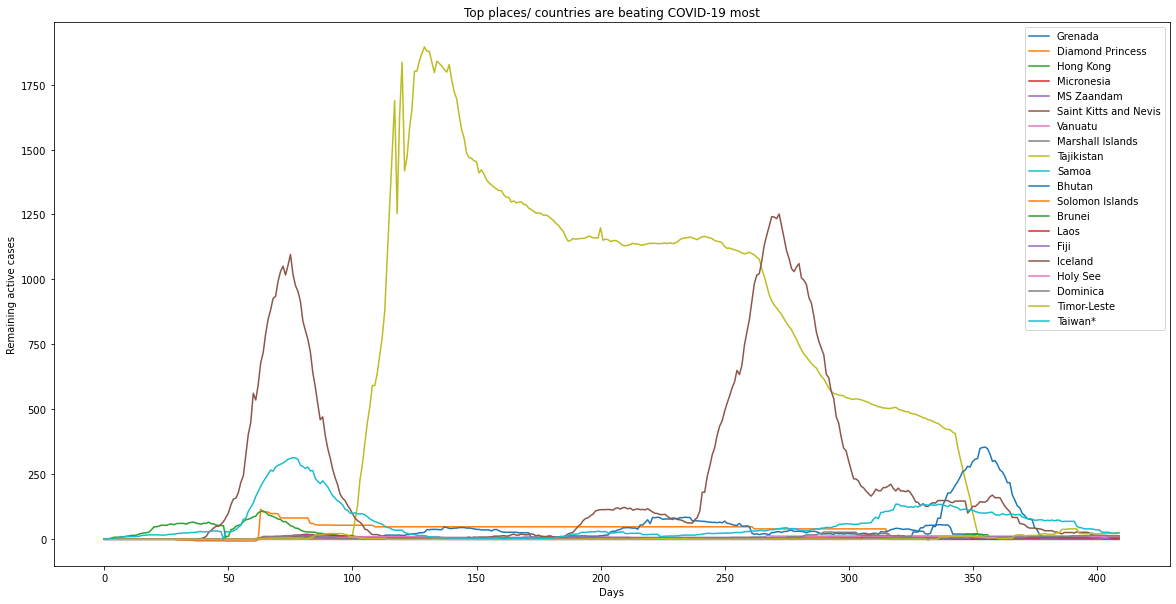

In [20]:
countries_remaining[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 most")
countries_remaining[top_remaining.index]

### Countries are beating COVID least

,409
US,17546424.0
United Kingdom,4089403.0
France,3581953.0
Spain,2927498.0
Netherlands,1100076.0
Brazil,988487.0
Belgium,763569.0
Sweden,671958.0
Serbia,477855.0
Italy,465812.0


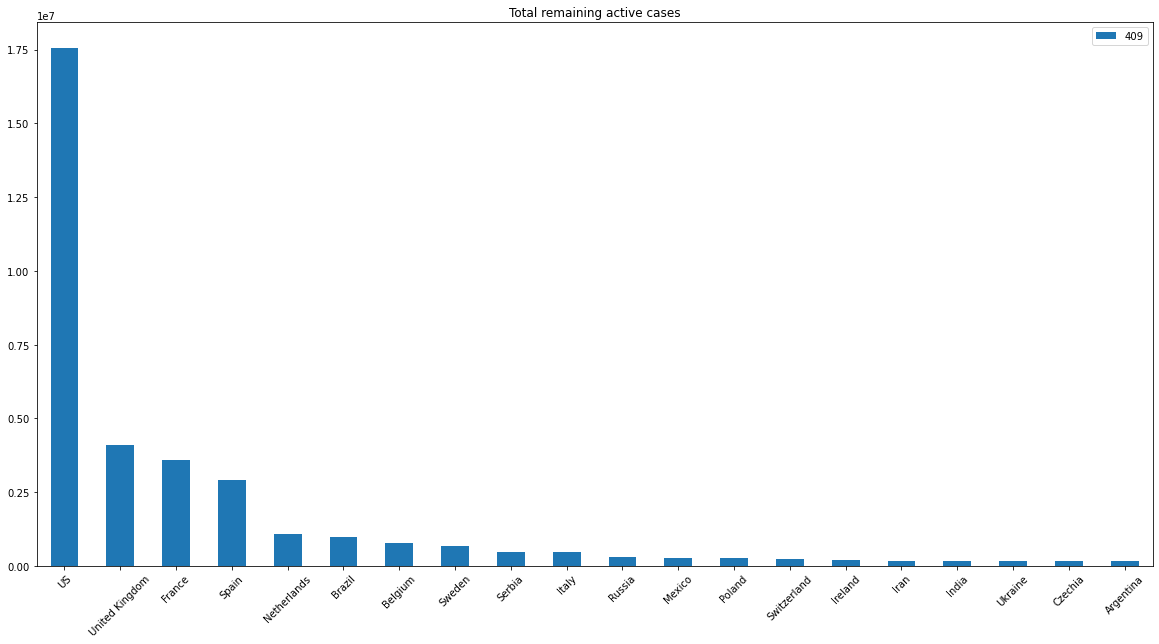

In [21]:
bottom_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.title("Total remaining active cases")
plt.xticks(rotation=45)
bottom_remaining

Text(0.5, 1.0, 'Top places/ countries are beating COVID-19 least')

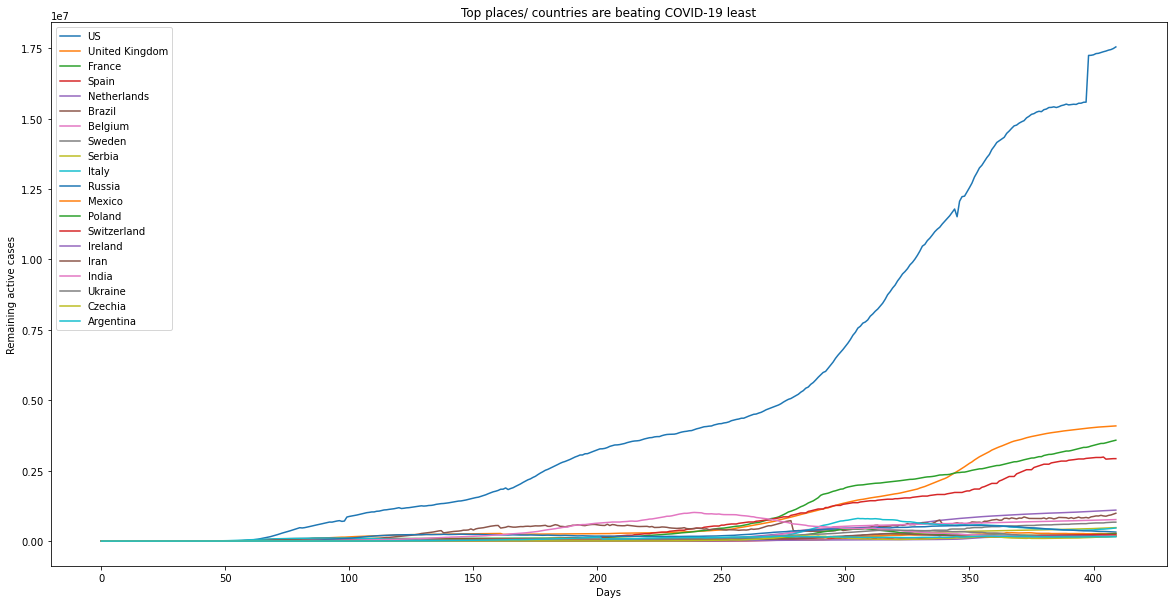

In [11]:
countries_remaining[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 least")